In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('musk_csv.csv')

In [3]:
df.head(3)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,6598.0,3299.500000,1904.822870,1.0,1650.25,3299.5,4948.75,6598.0
f1,6598.0,58.945135,53.249007,-31.0,37.00,44.0,53.00,292.0
f2,6598.0,-119.128524,90.813375,-199.0,-193.00,-149.0,-95.00,95.0
f3,6598.0,-73.146560,67.956235,-167.0,-137.00,-99.0,-19.00,81.0
f4,6598.0,-0.628372,80.444617,-114.0,-70.00,-25.0,42.00,161.0
...,...,...,...,...,...,...,...,...
f163,6598.0,201.760230,59.526751,73.0,166.00,191.0,215.00,625.0
f164,6598.0,-47.488330,55.069365,-289.0,-68.00,-60.0,-45.00,295.0
f165,6598.0,-150.259927,76.019023,-428.0,-179.00,-150.0,-120.00,168.0
f166,6598.0,41.770233,94.116085,-471.0,-9.00,27.0,119.00,367.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [6]:
len(df.columns)

170

In [7]:
print("Unique Molecule Names :",len(df['molecule_name'].unique()))
print("Unique conformation_names :",len(df['conformation_name'].unique()))

Unique Molecule Names : 102
Unique conformation_names : 6598


In [8]:
#Removing Columns
df  = df.drop(['ID','molecule_name','conformation_name'],axis = 1)

In [9]:
len(df.columns)

167

In [10]:
print(df.head(3))

   f1   f2   f3  f4   f5  f6  f7   f8  f9  f10  ...  f158  f159  f160  f161  \
0  46 -108  -60 -69 -117  49  38 -161  -8    5  ...  -308    52    -7    39   
1  41 -188 -145  22 -117  -6  57 -171 -39 -100  ...   -59    -2    52   103   
2  46 -194 -145  28 -117  73  57 -168 -39  -22  ...  -134  -154    57   143   

   f162  f163  f164  f165  f166  class  
0   126   156   -50  -112    96      1  
1   136   169   -61  -136    79      1  
2   142   165   -67  -145    39      1  

[3 rows x 167 columns]


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f1,6598.0,58.945135,53.249007,-31.0,37.0,44.0,53.0,292.0
f2,6598.0,-119.128524,90.813375,-199.0,-193.0,-149.0,-95.0,95.0
f3,6598.0,-73.146560,67.956235,-167.0,-137.0,-99.0,-19.0,81.0
f4,6598.0,-0.628372,80.444617,-114.0,-70.0,-25.0,42.0,161.0
f5,6598.0,-103.533495,64.387559,-118.0,-117.0,-117.0,-116.0,325.0
...,...,...,...,...,...,...,...,...
f163,6598.0,201.760230,59.526751,73.0,166.0,191.0,215.0,625.0
f164,6598.0,-47.488330,55.069365,-289.0,-68.0,-60.0,-45.0,295.0
f165,6598.0,-150.259927,76.019023,-428.0,-179.0,-150.0,-120.0,168.0
f166,6598.0,41.770233,94.116085,-471.0,-9.0,27.0,119.0,367.0


## Train Test Split and Preprocessing of Data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
y  = df['class']
X  = df.drop(['class'],axis = 1)

In [14]:
#Applying MinMax Scaler for numerical Columns

col_name ='f'
s_scaler = MinMaxScaler()

for i in range(1,167):
    vals = X[col_name+str(i)].values
    vals = np.reshape(vals,(len(vals),1 ))
    X[col_name+str(i)] = s_scaler.fit_transform(vals)

In [15]:
#print(X['molecule_name'].head(12))

In [16]:
#print(X.head(3))

In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
#print(X.head(2))

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [20]:
print("X_train shape : ",X_train.shape)
print("X_test  shape : ",X_test.shape)

X_train shape :  (5278, 166)
X_test  shape :  (1320, 166)


In [21]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
#Early Stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

## Multi-Layer Perceptron Model

In [23]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(168,activation='relu'))
model.add(tf.keras.layers.Dense(84,activation='relu'))
model.add(tf.keras.layers.Dense(42,activation='relu'))
model.add(tf.keras.layers.Dense(21,activation='relu'))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

165/165 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8816 - val_loss: 0.2050 - val_accuracy: 0.9189
Epoch 2/50
165/165 [==============================] - 0s 1ms/step - loss: 0.1861 - accuracy: 0.9308 - val_loss: 0.2059 - val_accuracy: 0.9205
Epoch 3/50
165/165 [==============================] - 0s 1ms/step - loss: 0.1675 - accuracy: 0.9354 - val_loss: 0.1663 - val_accuracy: 0.9348
Epoch 4/50
165/165 [==============================] - 0s 1ms/step - loss: 0.1397 -

In [25]:
history = pd.DataFrame(model.history.history)

## Saving  the Model

In [26]:
model.save("musk_model.h5")
#model = tf.keras.models.load_model("musk_model.h5")

## Loss Curve

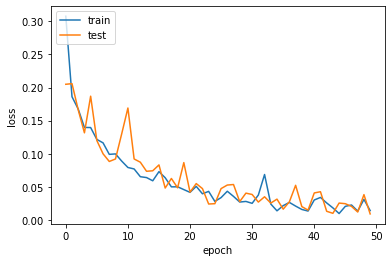

In [27]:
#LOSS CURVE
plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Accuracy Curve

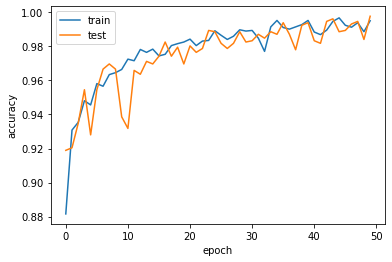

In [28]:
#Accuracy Curve

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Final Performance Measures

In [29]:
#predictions
preds = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

### Accuracy Score

In [31]:
print("Accuracy_Score : ",accuracy_score(y_test,preds).round(3))

Accuracy_Score :  0.998


### Classification Report

In [32]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       0.99      1.00      0.99       209

    accuracy                           1.00      1320
   macro avg       0.99      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



### Confusion Matrix

In [33]:
print(confusion_matrix(y_test,preds))

[[1108    3]
 [   0  209]]
